In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [7]:
# Carga de archivos al vuelo
#from google.colab import files
#uploaded = files.upload()

# Carga de archivos por drive
#from google.colab import drive
#drive.mount('/content/drive')

# Carga de archivos desde github
# Si el repositorio es público o existe el acceso
#url = 'https://raw.githubusercontent.com/usuario/repositorio/main/carpeta/archivo.csv'

In [8]:
# Cargar dataset
df = pd.read_csv('./datasets/pokemon/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [9]:
# Preprocesamiento
columns = ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense']

df_clean = df[columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [10]:
# Reducción para visualización (PCA a 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans'] = kmeans.fit_predict(X_scaled)

In [12]:
# DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5, metric="euclidean")
df['DBSCAN'] = dbscan.fit_predict(X_scaled)

In [13]:
# Agglomerative Clustering (jerárquico)
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo'] = agglo.fit_predict(X_scaled)

In [14]:
# Agregar columnas PCA para graficar
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

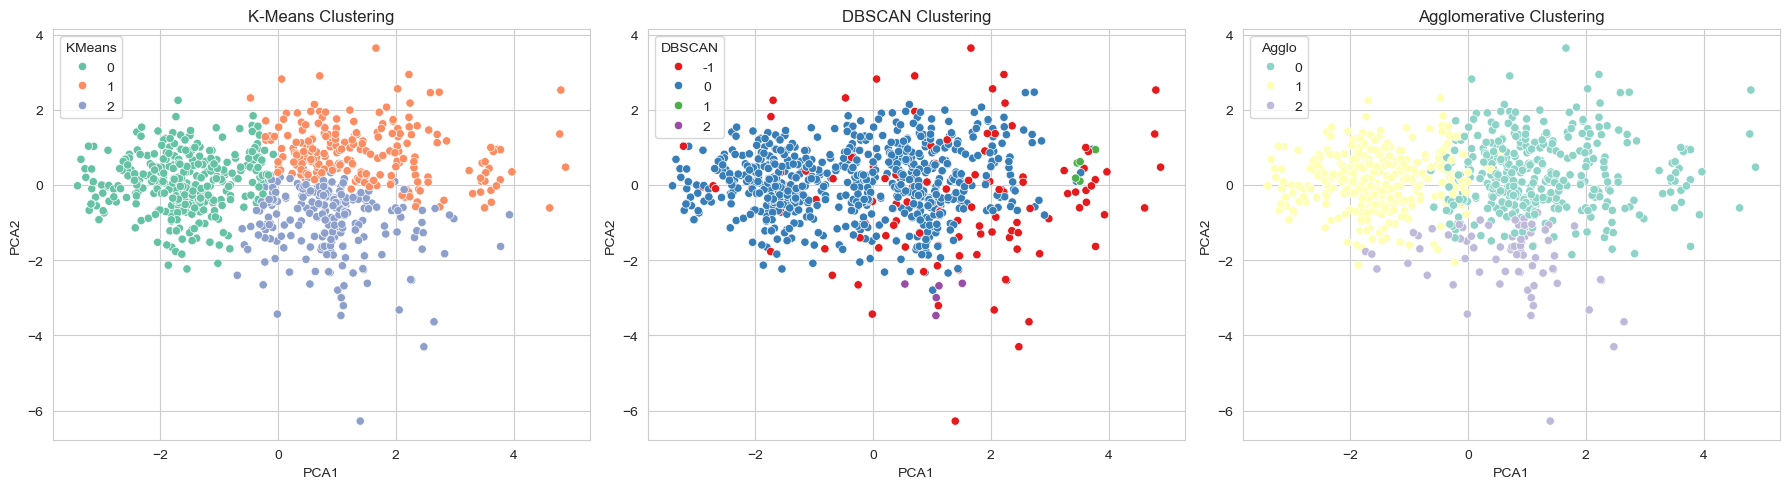

In [15]:
# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans', ax=axes[0], palette='Set2')
axes[0].set_title('K-Means Clustering')

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN', ax=axes[1], palette='Set1')
axes[1].set_title('DBSCAN Clustering')

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Agglo', ax=axes[2], palette='Set3')
axes[2].set_title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

In [16]:
# Análisis por clúster (ejemplo con KMeans)
df.groupby('KMeans')[columns].mean()

,hp,attack,defense,speed,sp_attack,sp_defense
KMeans,,,,,,
0,51.664723,55.897959,52.279883,52.959184,50.874636,50.381924
1,79.116071,99.058036,78.352679,100.205357,100.325893,85.272321
2,84.585470,89.752137,98.277778,53.517094,73.474359,87.256410
